# What is the impact of class imbalance and different sampling methods on the performance of machine learning algorithms for classification?

Class imbalance is a common challenge in many real-world classification problems. Having significantly fewer samples for one class can lead to biasad models that favor the majority class. This results in poor performance in detecting the minority class. In this research project, we investigate the impact of class imbalance on the performance of two popular machine learning algorithms: Support Vector Machines (SVM) and Neural Networks (NN). We compare the in-sample and out-of-sample performance of these algorithms on datasets with varying degrees of class imbalance using different techniques to adress this issue. Our goal is to provide insights into strengths and weaknesses of each algorithm and to identify the effective approach.


# Support Vector Machines

# Neural Networks

# The impact of class imbalance, comparing Support Vector Machines with Neural Networks

In [1]:
#import required for libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn


from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

#from sklearn.inspection import DecisionBoundaryDisplay
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.pipeline import make_pipeline


import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

2023-05-26 16:32:47.257645: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 16:32:47.302046: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 16:32:47.302845: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 16:32:48.098342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# 3 of 8 random state
def create_dataset(weights, n_samples, n_classes,
                   class_sep, n_clusters):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=5)

In [23]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

# SYNTHETIC DATASET

Class imbalance refers to a situation where the number of samples in different classes of a dataset is significantly uneven. This can have an impact on the decision boundary learned by a machine learning model, potentially leading to biased or skewed predictions. To illustrate the impact of class imbalances on the decision boundry we generated 4 synthetic datasets. Each set contains 2 classes but the level of imbalance vary.

1. Very unbalanced dataset: \
One class is heavily overrepresented, while the other class is underrepresented. This extreme class imbalance can make it challenging for a model to accurately learn the minority class, as the decision boundary may prioritize the majority class.
2. Unbalanced dataset: \
The majority class is still overrepresented but the imbalance is not as extreme as the very unbalanced dataset. The decision boundary in this case may show some consideration for the minority class, but it still is influenced by the majority class.
3. Moderate unbalanced dataset \
This dataset still exhibits a noticeable class imbalance, but to a lesser extent compared to the previous dataset.  The decision boundary learned by a model on this dataset may be more balanced, giving reasonable consideration to both classes.
4. Balanced Dataset: \
The last dataset is balanced, with an equal number of samples in each class. There is no class imbalance present, and the decision boundary learned by a model on this dataset should ideally provide fair and accurate predictions for both classes.

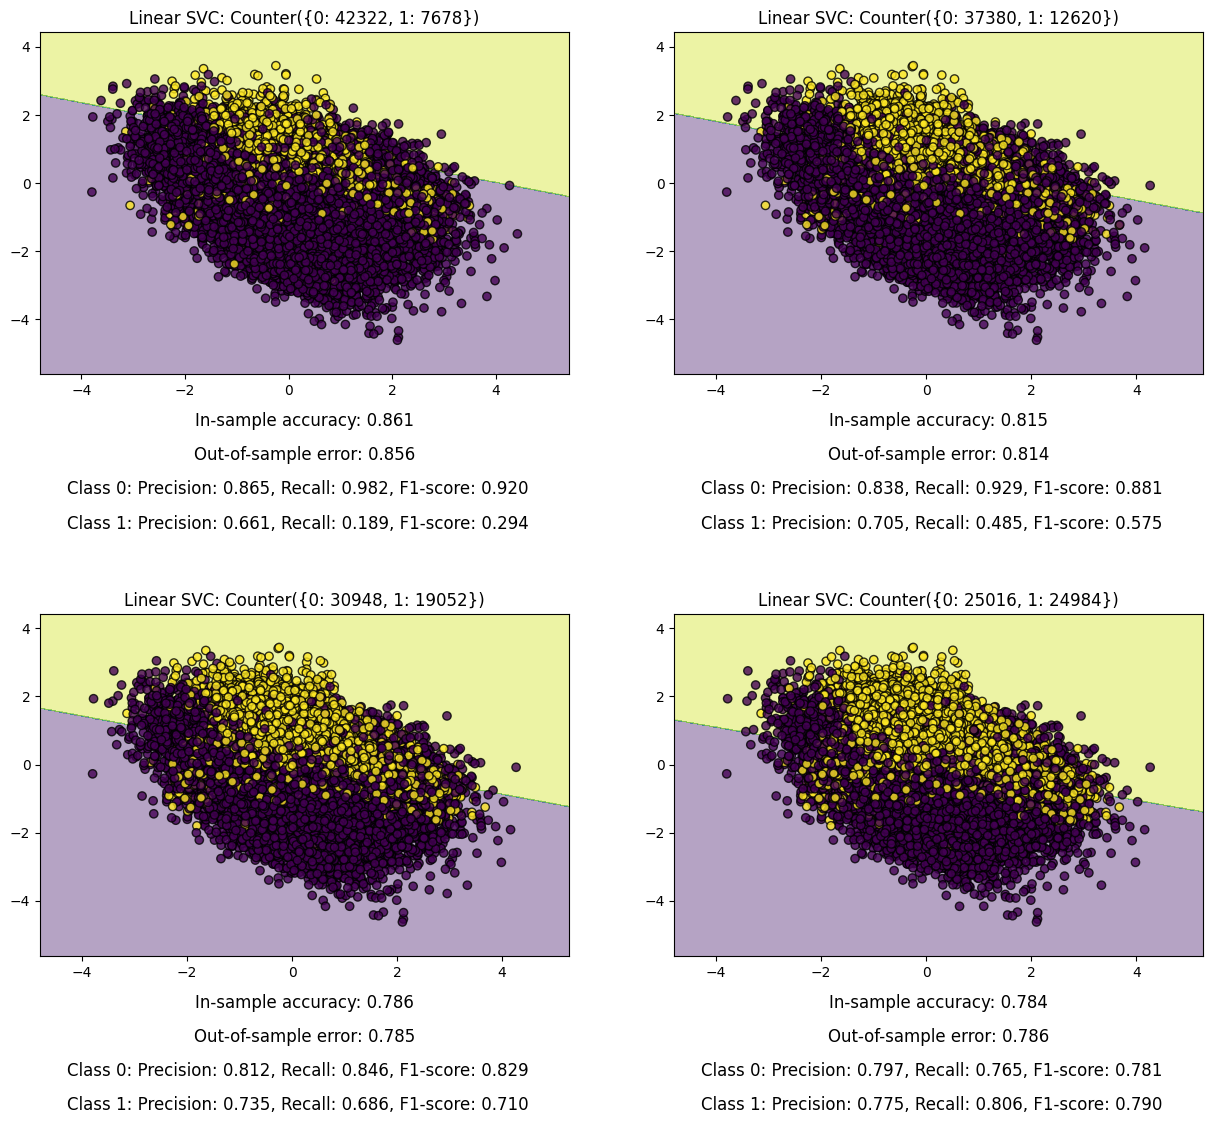

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)

weights_arr = ((0.85, 0.15), (0.75, 0.25), (0.62, 0.38), (0.5, 0.5))

for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=50000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
 
    ax.set_title('Linear SVC: {}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = LinearSVC().fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    cm = confusion_matrix(y_true, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample accuracy: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)




When working with imbalanced datasets it is important not only to look at the in and out of sample error as a metric to evaluate the performance of the model. Due to the class imbalance, these metrics can be misleading and do not reflect how well the model is handling the minority class. 
Precision is the ratio of true positives to all the positves. It measures the model's ability to correctly identify positive instances. A high precision indicates a low rate of false positive predictions.
Recall on the other hand is the ratio of true positives to sum of true positives and false negatives. It measures the model's abilility to correctly identify true positive instances. It is also called the Sensitivity or the True Positive Rate. A high recall indicates a low rate of false negatives.
The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance on both precision and recall. 
These metrics provide a more nuanced understanding of how well the model is performing on imbalanced datasets as they can highlight the model's ability to handle the minority class.


By looking at the in and out of sample error we can conclude that the model predicting the most unbalanced dataset scored best. The precision and recall of the majority class is high indicating is has a low rate of false positives and negatives. Because the class is very unbalanced this means the model is able correctly classifiy the larger majority of the dataset leading to an in-and out-of-sample accuracy of approximately 0.85. 

However, by looking at the f1-score, and the recall, we observe the model is failing to capture the positive instances. 

As the datasets gets slightly more balanced the precision, recall and F1-score of minority class improves while keeping the same precision and recall for the majority set. This indicates that balancing the dataset allows the model to have a better opportunity to learn from both classes.



# Neural Nets

Epoch 1/50
1094/1094 [==============================] - 2s 1ms/step - loss: 0.3080 - acc: 0.8720 - recall_18: 0.3454 - precision_18: 0.6430
Epoch 2/50
1094/1094 [==============================] - 2s 1ms/step - loss: 0.2949 - acc: 0.8769 - recall_18: 0.3602 - precision_18: 0.6740
Epoch 3/50
1094/1094 [==============================] - 1s 902us/step - loss: 0.2937 - acc: 0.8769 - recall_18: 0.3713 - precision_18: 0.6668
Epoch 4/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.2934 - acc: 0.8767 - recall_18: 0.3702 - precision_18: 0.6656
Epoch 5/50
1094/1094 [==============================] - 1s 938us/step - loss: 0.2930 - acc: 0.8780 - recall_18: 0.3713 - precision_18: 0.6760
Epoch 6/50
1094/1094 [==============================] - 1s 972us/step - loss: 0.2924 - acc: 0.8772 - recall_18: 0.3687 - precision_18: 0.6711
Epoch 7/50
1094/1094 [==============================] - 1s 900us/step - loss: 0.2922 - acc: 0.8775 - recall_18: 0.3643 - precision_18: 0.6763
Epoch 8/50
1

1094/1094 [==============================] - 1s 932us/step - loss: 0.3673 - acc: 0.8311 - recall_19: 0.5544 - precision_19: 0.7058
Epoch 8/50
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3660 - acc: 0.8325 - recall_19: 0.5598 - precision_19: 0.7082
Epoch 9/50
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3661 - acc: 0.8323 - recall_19: 0.5568 - precision_19: 0.7090
Epoch 10/50
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3664 - acc: 0.8330 - recall_19: 0.5544 - precision_19: 0.7128
Epoch 11/50
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3657 - acc: 0.8326 - recall_19: 0.5545 - precision_19: 0.7111
Epoch 12/50
1094/1094 [==============================] - 2s 1ms/step - loss: 0.3659 - acc: 0.8325 - recall_19: 0.5549 - precision_19: 0.7105
Epoch 13/50
1094/1094 [==============================] - 2s 1ms/step - loss: 0.3655 - acc: 0.8332 - recall_19: 0.5531 - precision_19: 0.7143
Epoch 14/50
1094/1094 [==

1094/1094 [==============================] - 2s 1ms/step - loss: 0.4178 - acc: 0.8029 - recall_20: 0.7229 - precision_20: 0.7496
Epoch 15/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.4178 - acc: 0.8029 - recall_20: 0.7222 - precision_20: 0.7499
Epoch 16/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.4175 - acc: 0.8037 - recall_20: 0.7213 - precision_20: 0.7520
Epoch 17/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.4172 - acc: 0.8033 - recall_20: 0.7192 - precision_20: 0.7522
Epoch 18/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.4172 - acc: 0.8035 - recall_20: 0.7217 - precision_20: 0.7513
Epoch 19/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.4173 - acc: 0.8039 - recall_20: 0.7205 - precision_20: 0.7528
Epoch 20/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.4169 - acc: 0.8029 - recall_20: 0.7179 - precision_20: 0.7520
Epoch 21/50
1094/1094 [==

1094/1094 [==============================] - 1s 989us/step - loss: 0.4243 - acc: 0.7999 - recall_21: 0.8134 - precision_21: 0.7918
Epoch 21/50
1094/1094 [==============================] - 1s 981us/step - loss: 0.4243 - acc: 0.7986 - recall_21: 0.8131 - precision_21: 0.7899
Epoch 22/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.4241 - acc: 0.8001 - recall_21: 0.8124 - precision_21: 0.7927
Epoch 23/50
1094/1094 [==============================] - 1s 969us/step - loss: 0.4243 - acc: 0.7990 - recall_21: 0.8125 - precision_21: 0.7909
Epoch 24/50
1094/1094 [==============================] - 1s 974us/step - loss: 0.4240 - acc: 0.7993 - recall_21: 0.8106 - precision_21: 0.7925
Epoch 25/50
1094/1094 [==============================] - 1s 983us/step - loss: 0.4239 - acc: 0.7999 - recall_21: 0.8153 - precision_21: 0.7906
Epoch 26/50
1094/1094 [==============================] - 1s 985us/step - loss: 0.4239 - acc: 0.7999 - recall_21: 0.8111 - precision_21: 0.7930
Epoch 27/50
1

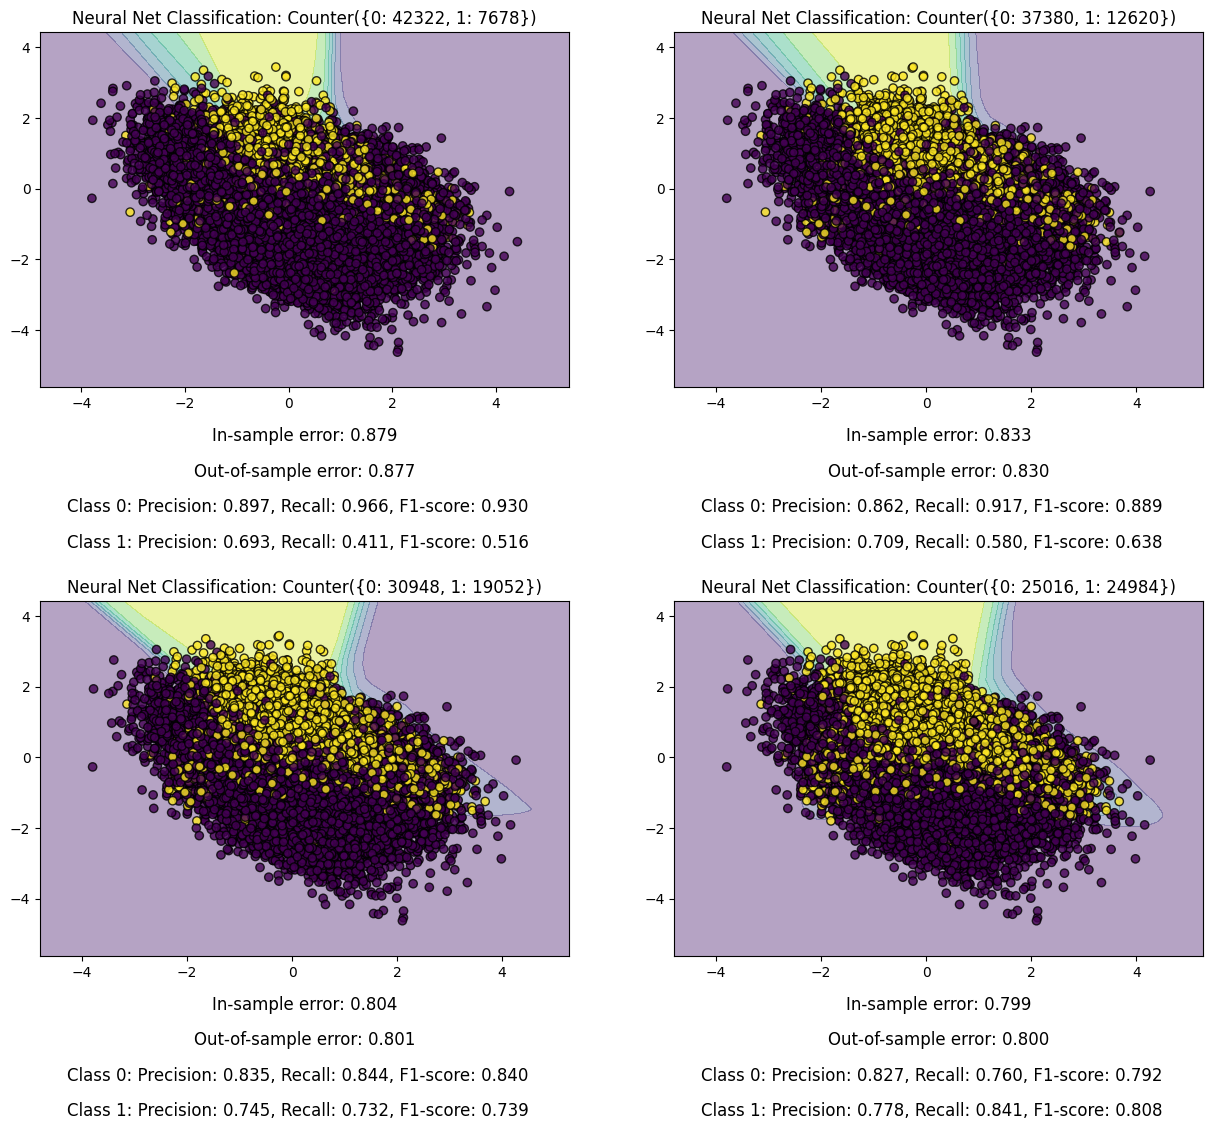

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.6)

ax_arr = (ax1, ax2, ax3, ax4)

weights_arr = ((0.85, 0.15), (0.75, 0.25), (0.62, 0.38), (0.5, 0.5))

for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=50000, n_classes=2, class_sep=0.6, n_clusters=2)

    ax.set_title('Neural Net Classification: {}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Neural Net
    clf = Sequential()
    clf.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    clf.add(Dense(64, activation='relu')) 
    clf.add(Dense(46, activation='relu'))# Hidden layer
    clf.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model with the custom loss function
    clf.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    
    clf.fit(X_train, y_train, epochs=50, batch_size=32)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, np.round(y_pred_train))

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, np.round(y_pred_test))
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, np.round(y_pred_test).astype(int), zero_division=1, output_dict=True)

    for label in class_labels:
        ax.text(0.05, -0.35 - label * 0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

    

Based on our observation, we find that a neural network is less influenced by the class imbalance compared to a SVM. This suggests that a neural network may have inherent capabilities to handle the imbalanced dataset more effectively. They can learn complex patterns from data and adapt their internal parameters to handle the class imbalance.

The in and out of sample error of NN and SVM prediction the most unbalanced dataset is comparable. However, when considering precision, recall, and F1-score, the NN demonstrates superior performance. 


A recall of approximately 0.5 for the NN on the most imbalanced dataset indicates that it is able to correctly identify a larger proportion of positive instances in the minority class compared to the SVM's recall of 0.2. Also the precision and F1-score are higher indicating the NN performs better across all three metrics. Although the metrics are higher, they are not at a satisfactory level. The class imbalance still poses a challange. We observe that also in the case of NN, the metrics improve as the classes get more balanced, indicating the potential of additional techniques to improve performance.

# OVERSAMPLING 

## Random over-sampling
The most naive class of techniques for dealing with class imbalances is sampling. Random over-sampling involves duplicating some of the minority class samples at random until the dataset is balanced. This helps the model to earn from more examples of the minority class, potentially improving its ability to classify these instances accuratly. 
However, this approach of duplicating may not effectively capture the underlying distribution of the minority class, leading to overfitting and biased results.


## SMOTE & ADASYN
Synthetic Minority Over-Sampling (SMOTE) and Adaptive Synthetic Sampling (ADASYN) are a more advanced technique that generates samples based on the interpolation. However, the samples used to interpolate new synthetic samples differ. ADASYN is and extension of SMOTE and focussen of generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier. SMOTE will not make any distinction between easy and hard samples and generates samples uniformly across the minority class.(https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn). 


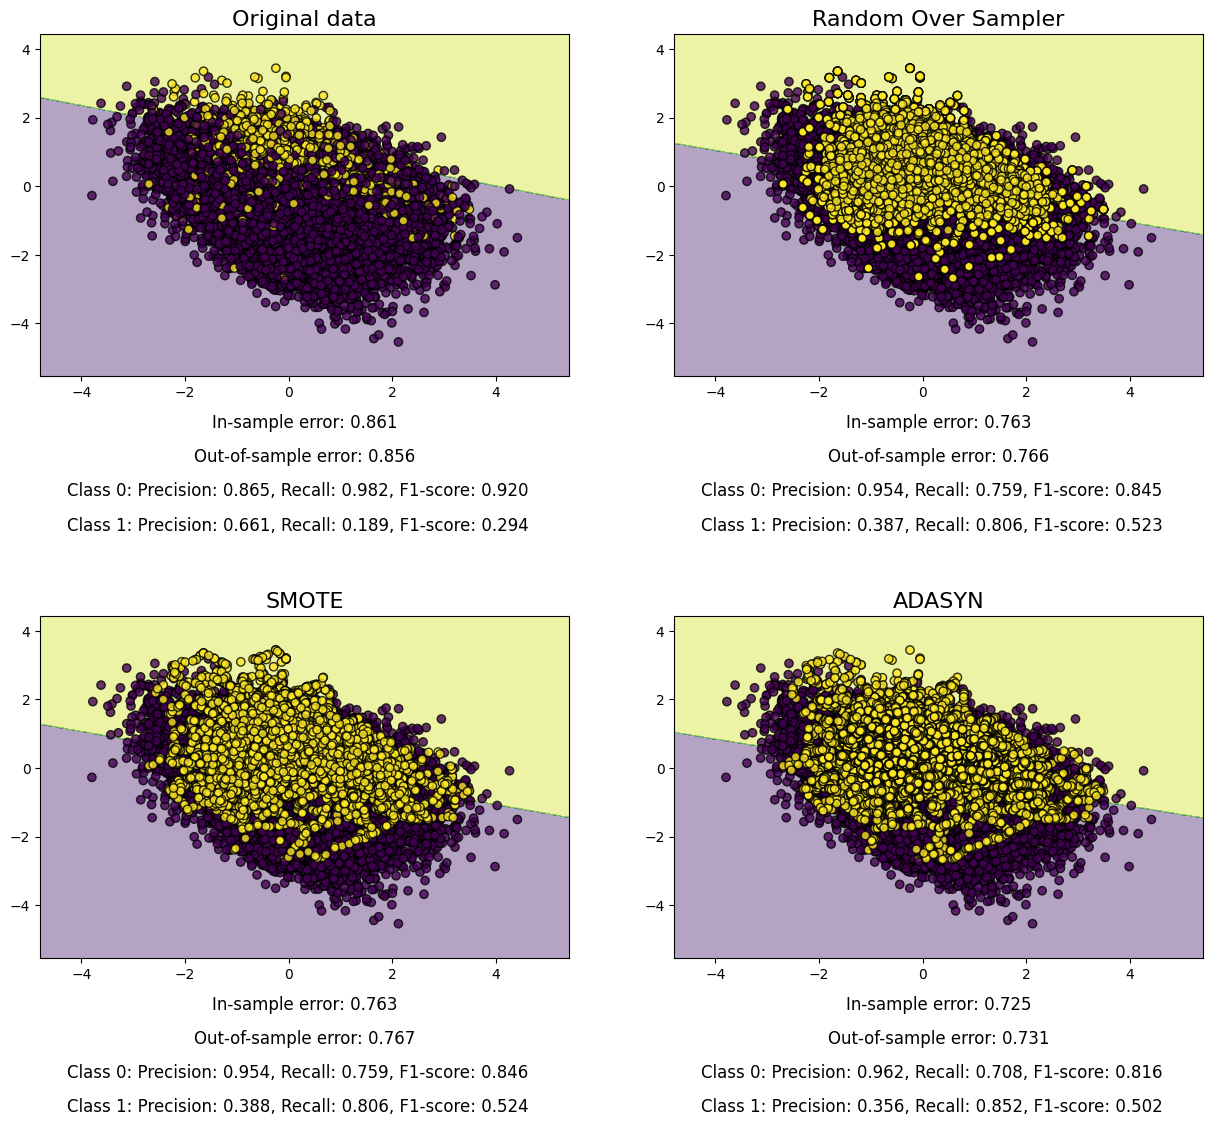

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.85, 0.15), n_samples=50000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = LinearSVC()
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    clf.fit(X_resampled, y_resampled)
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    
    ax.set_title(title, fontsize=16)
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    y_true = y_test
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

To evaluate and compare the effect of different over-sampling techniques we used the most unbalanced synthetic dataset from the first comparison. We observe an improvement in recall compared to the baseline. This improvement suggests that the models are better at recognizing the minority class and reducing false negative mistakes. However this improvement comes at the expense of the precision. The recall-precision trade-off can be understood as a consequence of sampling positive instances. By increasing the number of positive samples in the training set, the model can become more familiar with the minority class and its unique characteristics. 

As threshold for classifying an instance as positive is lowered it becomes easier for instances to be classified as positives, leading to more true positive instances from the minority class but also more false positive instances from the majority class. As a result the precision decreases and recall increases, because more true positives leads to less false negitves.


469/469 [==============================] - 0s 753us/step


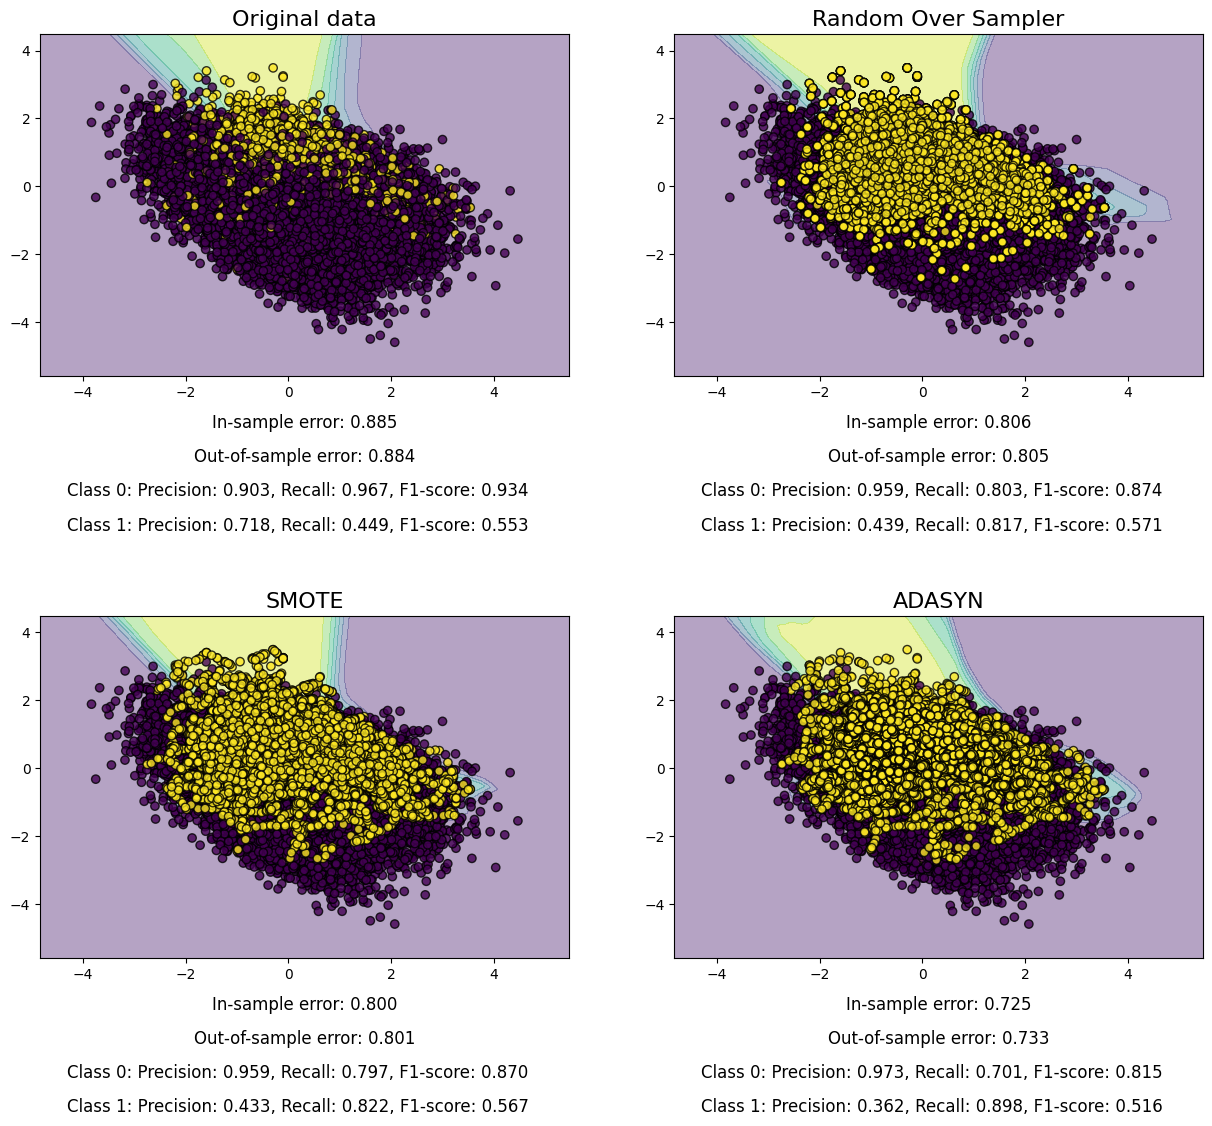

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.85, 0.15), n_samples=50000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Neural Net
    clf = Sequential()
    clf.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    clf.add(Dense(64, activation='relu')) 
    clf.add(Dense(46, activation='relu'))# Hidden layer
    clf.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    clf.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    clf.fit(X_resampled, y_resampled, epochs=50, verbose=0)
    
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    ax.set_title(title, fontsize=16)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, np.round(y_pred_train))

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, np.round(y_pred_test))
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, np.round(y_pred_test).astype(int), zero_division=1, output_dict=True)

    for label in class_labels:
        ax.text(0.05, -0.35 - label * 0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)


The neural network (NN) model, similar to the support vector machine (SVM) model, is subject to a precision-recall trade-off when dealing with class imbalance. Applying the over-sampling techniques did not lead to an improvement of the F1-scores of the minority class.

Because NN are powerfull models with the ability to learn complex patterns, we were not satisfied with the results of the sampling techniques on NN and tried a different approach.


# Neural Network - MEAN FALSE ERROR (MFE)

Instead of pre-processing the data, we tried focussing on the loss function of a NN. In general, in the training process of the NN an error function expressed as the loss over the whole training set is introduced. This loss function can take many forms, such as the Mean Squared Error (MSE) or Binary Cross Entropy (BCE). BCE is a loss function commonly used in binary classification and it is the one we used in the previous NN. To tackle the imbalance Wang, Shoujin, et al. proposed the Mean False Error loss function. It is inspired by concepts "false positive rate" and "false negative rate". It is designed to improve the performance on imbalanced data sets by making the loss more sensitive to errors from the minority class compared with commonly used loss functions. (source http://203.170.84.89/~idawis33/DataScienceLab/publication/IJCNN15.wang.final.pdf)

In [32]:
def mean_false_error(y_true, y_pred):
    # Define epsilon to prevent 'division by zero' error
    epsilon = K.epsilon()

    # Convert predictions to binary values (0 and 1)
    y_pred_binary = K.round(K.clip(y_pred, 0, 1))

    # Convert y_true to the same type as y_pred
    y_true = tf.cast(y_true, tf.float32)

    # Identify False Positives and False Negatives
    false_positives = K.clip((y_pred_binary - y_true), 0, 1)
    false_negatives = K.clip((y_true - y_pred_binary), 0, 1)

    # Calculate errors for each class 
    fp_error = (K.square(y_pred - y_true) * false_positives)/2
    fn_error = (K.square(y_pred - y_true) * false_negatives)/2

    # Calculate FPE and FNE
    fpe = K.sum(fp_error) / (K.sum(1 - y_true) + epsilon)
    fne = K.sum(fn_error) / (K.sum(y_true) + epsilon)

    return fpe + fne

469/469 [==============================] - 0s 659us/step


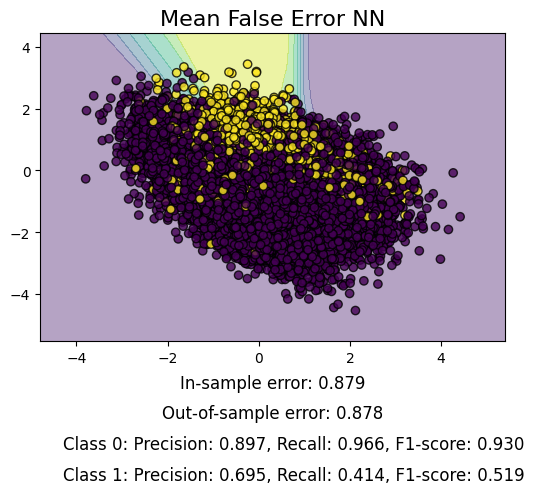

In [30]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(figsize=(6, 4))

# First, let's create your dataset
X, y = X, y = create_dataset(weights=(0.85, 0.15), n_samples=50000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu')) 
model.add(Dense(46, activation='relu'))# Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with the custom loss function
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

plot_decision_function(X_train, y_train, model, ax)
ax.set_title("Mean False Error NN", fontsize=16)

y_true = y_test
    
# compute in-sample error (accuracy on the training set)
y_pred_train = model.predict(X_train)
in_sample_error = accuracy_score(y_train, np.round(y_pred_train))

# compute out-of-sample error (accuracy on the testing set)
y_pred_test = model.predict(X_test)
out_of_sample_error = accuracy_score(y_test, np.round(y_pred_test))

ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)

class_labels = np.unique(y)
report = classification_report(y_true, np.round(y_pred_test).astype(int), zero_division=1, output_dict=True)

for label in class_labels:
    ax.text(0.05, -0.35 - label * 0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)


469/469 [==============================] - 1s 1ms/step


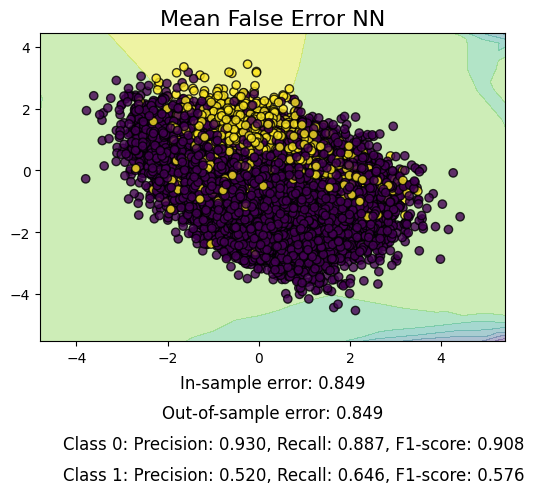

In [35]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(figsize=(6, 4))

# First, let's create your dataset
X, y = X, y = create_dataset(weights=(0.85, 0.15), n_samples=50000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu')) 
model.add(Dense(46, activation='relu'))# Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with the custom loss function
model.compile(loss=mean_false_error_gpt, optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

plot_decision_function(X_train, y_train, model, ax)
ax.set_title("Mean False Error NN", fontsize=16)

y_true = y_test
    
# compute in-sample error (accuracy on the training set)
y_pred_train = model.predict(X_train)
in_sample_error = accuracy_score(y_train, np.round(y_pred_train))

# compute out-of-sample error (accuracy on the testing set)
y_pred_test = model.predict(X_test)
out_of_sample_error = accuracy_score(y_test, np.round(y_pred_test))

ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)

class_labels = np.unique(y)
report = classification_report(y_true, np.round(y_pred_test).astype(int), zero_division=1, output_dict=True)

for label in class_labels:
    ax.text(0.05, -0.35 - label * 0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)


In [34]:
def mean_false_error_gpt(y_true, y_pred):
    # Define epsilon to prevent 'division by zero' error
    epsilon = K.epsilon()

    # Convert predictions to binary values (0 and 1)
    y_pred_binary = K.round(K.clip(y_pred, 0, 1))

    # Convert y_true to the same type as y_pred
    y_true = tf.cast(y_true, tf.float32)

    # Identify False Positives and False Negatives
    false_positives = K.clip((y_pred_binary - y_true), 0, 1)
    false_negatives = K.clip((y_true - y_pred_binary), 0, 1)

    # Calculate errors for each class
    fp_error = K.square(y_pred - y_true) * false_positives
    fn_error = K.square(y_pred - y_true) * false_negatives

    # Calculate FPE and FNE
    fpe = K.sum(fp_error) / (K.sum(false_positives) + epsilon)
    fne = K.sum(fn_error) / (K.sum(false_negatives) + epsilon)

    return fpe + fne


def mean_squared_false_error_gpt(y_true, y_pred):
    # Define epsilon to prevent 'division by zero' error
    epsilon = K.epsilon()

    # Convert predictions to binary values (0 and 1)
    y_pred_binary = K.round(K.clip(y_pred, 0, 1))

    # Convert y_true to the same type as y_pred
    y_true = tf.cast(y_true, tf.float32)

    # Identify False Positives and False Negatives
    false_positives = K.clip((y_pred_binary - y_true), 0, 1)
    false_negatives = K.clip((y_true - y_pred_binary), 0, 1)

    # Calculate errors for each class
    fp_error = K.square(y_pred - y_true) * false_positives
    fn_error = K.square(y_pred - y_true) * false_negatives

    # Calculate FPE and FNE
    fpe = K.sum(fp_error) / (K.sum(false_positives) + epsilon)
    fne = K.sum(fn_error) / (K.sum(false_negatives) + epsilon)

    return (K.square(fpe + fne) + K.square(fpe - fne))/2

def mean_false_error(y_true, y_pred):
    # Define epsilon to prevent 'division by zero' error
    epsilon = K.epsilon()

    # Convert predictions to binary values (0 and 1)
    y_pred_binary = K.round(K.clip(y_pred, 0, 1))

    # Convert y_true to the same type as y_pred
    y_true = tf.cast(y_true, tf.float32)

    # Identify False Positives and False Negatives
    false_positives = K.clip((y_pred_binary - y_true), 0, 1)
    false_negatives = K.clip((y_true - y_pred_binary), 0, 1)

    # Calculate errors for each class 
    fp_error = (K.square(y_pred - y_true) * false_positives)/2
    fn_error = (K.square(y_pred - y_true) * false_negatives)/2

    # Calculate FPE and FNE
    fpe = K.sum(fp_error) / (K.sum(1 - y_true) + epsilon)
    fne = K.sum(fn_error) / (K.sum(y_true) + epsilon)

    return fpe + fne


def mean_squared_false_error(y_true, y_pred):
    # Define epsilon to prevent 'division by zero' error
    epsilon = K.epsilon()

    # Convert predictions to binary values (0 and 1)
    y_pred_binary = K.round(K.clip(y_pred, 0, 1))

    # Convert y_true to the same type as y_pred
    y_true = tf.cast(y_true, tf.float32)

    # Identify False Positives and False Negatives
    false_positives = K.clip((y_pred_binary - y_true), 0, 1)
    false_negatives = K.clip((y_true - y_pred_binary), 0, 1)

    # Calculate errors for each class
    fp_error = (K.square(y_pred - y_true) * false_positives)/2
    fn_error = (K.square(y_pred - y_true) * false_negatives)/2

    # Calculate FPE and FNE
    fpe = K.sum(fp_error) / (K.sum(1 - y_true) + epsilon)
    fne = K.sum(fn_error) / (K.sum(y_true) + epsilon)

    return K.square(fpe) + K.square(fne)

In [49]:
# Define the model architecture
model_gpt = Sequential()
model_gpt.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model_gpt.add(Dense(64, activation='relu')) 
model_gpt.add(Dense(46, activation='relu'))# Hidden layer
model_gpt.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with the custom loss function
model_gpt.compile(loss=mean_false_error_gpt, optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Train the model
model_gpt.fit(X_train, y_train, epochs=50, batch_size=32)

print("Evaluate gpt")
model_gpt.evaluate(X_test, y_test)


Epoch 1/50
1094/1094 [==============================] - 2s 1ms/step - loss: 0.4169 - acc: 0.8434 - recall_11: 0.6250 - precision_11: 0.4911
Epoch 2/50
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3471 - acc: 0.7977 - recall_11: 0.7097 - precision_11: 0.4077
Epoch 3/50
1094/1094 [==============================] - 1s 918us/step - loss: 0.3418 - acc: 0.7784 - recall_11: 0.7198 - precision_11: 0.3815
Epoch 4/50
1094/1094 [==============================] - 1s 927us/step - loss: 0.3293 - acc: 0.7612 - recall_11: 0.7233 - precision_11: 0.3606
Epoch 5/50
1094/1094 [==============================] - 1s 935us/step - loss: 0.3121 - acc: 0.7509 - recall_11: 0.7500 - precision_11: 0.3527
Epoch 6/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.3029 - acc: 0.7322 - recall_11: 0.7651 - precision_11: 0.3357
Epoch 7/50
1094/1094 [==============================] - 1s 905us/step - loss: 0.2840 - acc: 0.6866 - recall_11: 0.7731 - precision_11: 0.2982
Epoch 8/50
1

[0.19778668880462646,
 0.9580000042915344,
 0.7381881475448608,
 0.9849624037742615]

In [50]:
# Define the model architecture
model_gpt_square = Sequential()
model_gpt_square.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model_gpt_square.add(Dense(64, activation='relu')) 
model_gpt_square.add(Dense(46, activation='relu'))# Hidden layer
model_gpt_square.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with the custom loss function
model_gpt_square.compile(loss=mean_squared_false_error_gpt, optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Train the model
model_gpt_square.fit(X_train, y_train, epochs=50, batch_size=32)

print("Evaluate gpt square")
model_gpt_square.evaluate(X_test, y_test)


Epoch 1/50
1094/1094 [==============================] - 2s 1ms/step - loss: 0.1078 - acc: 0.8332 - recall_12: 0.6388 - precision_12: 0.4673
Epoch 2/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0897 - acc: 0.7957 - recall_12: 0.7149 - precision_12: 0.4054
Epoch 3/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0855 - acc: 0.7827 - recall_12: 0.7190 - precision_12: 0.3872
Epoch 4/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0844 - acc: 0.7863 - recall_12: 0.7280 - precision_12: 0.3933
Epoch 5/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0830 - acc: 0.7917 - recall_12: 0.7448 - precision_12: 0.4027
Epoch 6/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0781 - acc: 0.7555 - recall_12: 0.7578 - precision_12: 0.3588
Epoch 7/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0756 - acc: 0.7764 - recall_12: 0.7687 - precision_12: 0.3848
Epoch 8/50
1094/1094

[0.047319311648607254,
 0.9598000049591064,
 0.7490246891975403,
 0.9863013625144958]

In [51]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu')) 
model.add(Dense(46, activation='relu'))# Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with the custom loss function
model.compile(loss=mean_false_error, optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model.fit(X_train, y_train, epochs=50, batch_size=32)

print("Evaluate ")
model.evaluate(X_test, y_test)


Epoch 1/50
1094/1094 [==============================] - 2s 1ms/step - loss: 0.0641 - acc: 0.7516 - recall_13: 0.7494 - precision_13: 0.3534
Epoch 2/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0566 - acc: 0.7747 - recall_13: 0.7735 - precision_13: 0.3833
Epoch 3/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0568 - acc: 0.7744 - recall_13: 0.7782 - precision_13: 0.3835
Epoch 4/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0556 - acc: 0.7779 - recall_13: 0.7769 - precision_13: 0.3877
Epoch 5/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0551 - acc: 0.7801 - recall_13: 0.7799 - precision_13: 0.3908
Epoch 6/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0566 - acc: 0.7734 - recall_13: 0.7737 - precision_13: 0.3817
Epoch 7/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0556 - acc: 0.7776 - recall_13: 0.7787 - precision_13: 0.3875
Epoch 8/50
1094/1094

[0.02258998341858387,
 0.9610000252723694,
 0.8313827514648438,
 0.9072847962379456]

In [16]:
# Define the model architecture
model_square = Sequential()
model_square.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model_square.add(Dense(64, activation='relu')) 
model_square.add(Dense(46, activation='relu'))# Hidden layer
model_square.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model with the custom loss function
model_square.compile(loss=mean_squared_false_error, optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])


model_square.fit(X_train, y_train, epochs=50, batch_size=32)

print("Evaluate square")
model_square.evaluate(X_test, y_test)


Epoch 1/50
1094/1094 [==============================] - 2s 963us/step - loss: 0.0037 - acc: 0.7141 - recall_27: 0.7697 - precision_27: 0.3167
Epoch 2/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0034 - acc: 0.7261 - recall_27: 0.7649 - precision_27: 0.3267
Epoch 3/50
1094/1094 [==============================] - 1s 907us/step - loss: 0.0034 - acc: 0.7279 - recall_27: 0.7689 - precision_27: 0.3290
Epoch 4/50
1094/1094 [==============================] - 1s 909us/step - loss: 0.0038 - acc: 0.7124 - recall_27: 0.7698 - precision_27: 0.3153
Epoch 5/50
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0039 - acc: 0.7172 - recall_27: 0.7795 - precision_27: 0.3209
Epoch 6/50
1094/1094 [==============================] - 1s 914us/step - loss: 0.0040 - acc: 0.7137 - recall_27: 0.7766 - precision_27: 0.3174
Epoch 7/50
1094/1094 [==============================] - 1s 932us/step - loss: 0.0040 - acc: 0.7176 - recall_27: 0.7723 - precision_27: 0.3201
Epoch 8/50

[0.012553364038467407,
 0.8567333221435547,
 0.1173512190580368,
 0.8668730854988098]

In [11]:
from sklearn import datasets 
data = datasets.load_breast_cancer()
features = data['data']
labels = data['target']
df = pd.DataFrame(features, columns = data['feature_names'])
df.insert(loc=0, column='labels', value=labels)
df.head()

labels  mean radius  mean texture  mean perimeter  mean area   
0       0        17.99         10.38          122.80     1001.0  \
1       0        20.57         17.77          132.90     1326.0   
2       0        19.69         21.25          130.00     1203.0   
3       0        11.42         20.38           77.58      386.1   
4       0        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points   
0          0.11840           0.27760          0.3001              0.14710  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst radius  worst texture  worst perimeter   
0         0.2419  ...         25.38          17.33           184.60  \
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity   
0      2019.0            0.1622             0.6656           0.7119  \
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [17]:
df['labels'].value_counts()

labels
1    357
0    212
Name: count, dtype: int64